# **Customer Segmentation**

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Loading the data

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA 

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_17820\2184719900.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, palette='pastel')


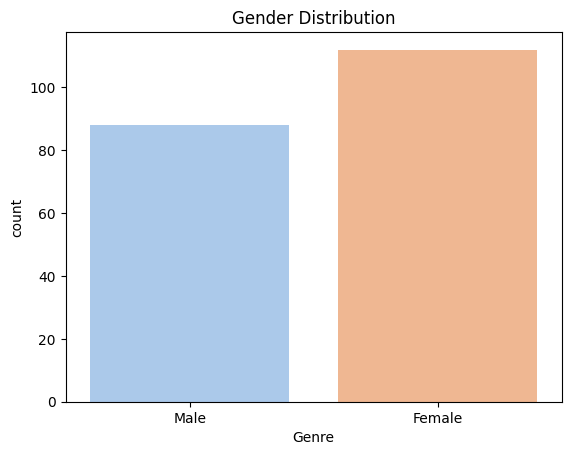

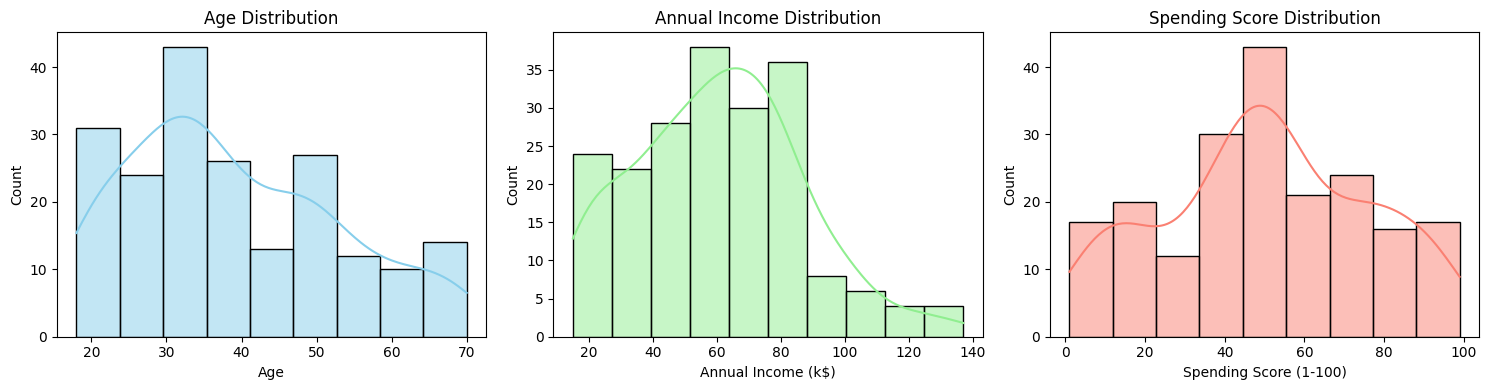

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop CustomerID (not useful for clustering)
df = df.drop('CustomerID', axis=1)

# Check basic stats
display(df.describe())

# Gender distribution
sns.countplot(x='Genre', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()

# Distributions of Age, Income, and Spending
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1], color='lightgreen')
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2], color='salmon')
axes[0].set_title('Age Distribution')
axes[1].set_title('Annual Income Distribution')
axes[2].set_title('Spending Score Distribution')
plt.tight_layout()
plt.show()


The Mall Customer dataset provides demographic and behavioral data for 200 shoppers, including gender, age, annual income, and spending score.
Overall, the data is clean, balanced, and well-suited for customer segmentation analysis.

Gender Distribution:
The dataset shows a slightly higher number of female customers compared to males. This balanced ratio indicates a diverse customer base without strong gender bias.

Age Distribution:
Most customers are between 25 and 40 years old, suggesting the mall’s main audience is young to middle-aged adults. There are fewer older customers (above 50), indicating lower engagement from that demographic.

Annual Income:
Annual income ranges from $15k to $137k, with most customers earning around $60k–$70k. This wide range makes income an excellent feature for identifying spending capacity and segmentation potential.

Spending Score:
Spending behavior appears bimodal — one group tends to spend less, while another spends a lot. This is a strong indicator that customers can be grouped into distinct categories based on their spending habits.

# Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Quick check
print(pd.DataFrame(X_scaled, columns=['Income_scaled', 'Spending_scaled']).describe())


       Income_scaled  Spending_scaled
count   2.000000e+02     2.000000e+02
mean   -2.131628e-16    -1.465494e-16
std     1.002509e+00     1.002509e+00
min    -1.738999e+00    -1.910021e+00
25%    -7.275093e-01    -5.997931e-01
50%     3.587926e-02    -7.764312e-03
75%     6.656748e-01     8.851316e-01
max     2.917671e+00     1.894492e+00


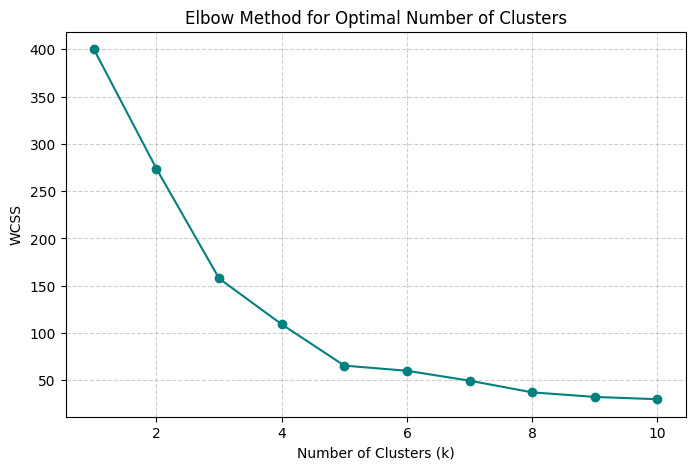

In [5]:
# Elbow Method (Finding Optimal k)
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='teal')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


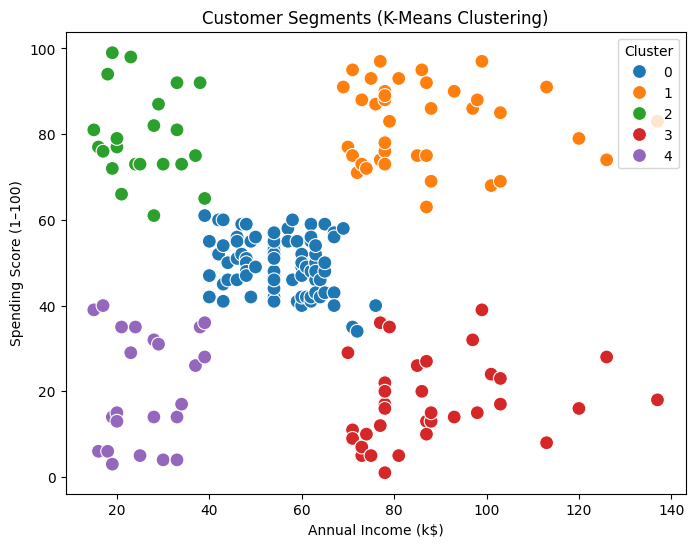

In [6]:
# kmeans with optimal k
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=100
)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster', loc='upper right')
plt.show()


In [ ]:
# Cluster Characteristics Summary
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.3,49.5
1,86.5,82.1
2,25.7,79.4
3,88.2,17.1
4,26.3,20.9


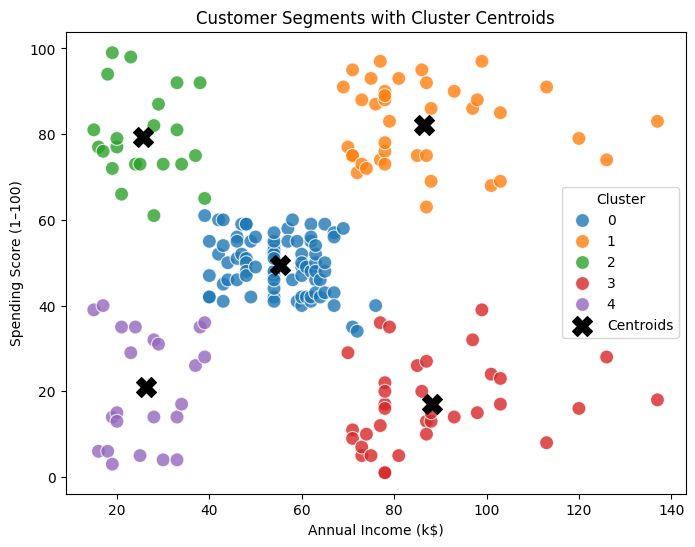

In [8]:
# Add Cluster Centroids to the Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster centers (inverse scaled for readability)
centers = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    data=df,
    s=100,
    alpha=0.8
)

# Plot centroids
plt.scatter(
    centers_original[:, 0],
    centers_original[:, 1],
    c='black',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title('Customer Segments with Cluster Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster')
plt.show()


This project aimed to segment mall customers based on their annual income and spending score using K-Means clustering.
The dataset contained 200 customer records with demographic and financial information.
After exploring and scaling the features, the Elbow Method indicated that the optimal number of clusters was five.

The K-Means algorithm successfully grouped customers into five distinct segments, visualized in the scatter plot above.
Each cluster represents a unique customer profile, summarized as follows:
| Cluster | Characteristics             | Description                              |
| ------- | --------------------------- | ---------------------------------------- |
| **0**   | Average income and spending | Balanced, typical mall customers         |
| **1**   | High income, high spending  | Premium customers — valuable and loyal   |
| **2**   | Low income, high spending   | Impulsive or trend-driven shoppers       |
| **3**   | High income, low spending   | Wealthy but cautious or selective buyers |
| **4**   | Low income, low spending    | Budget-conscious customers               |

The centroids (black “X” markers) represent the mean income and spending score of each group, confirming the clear separation between segments.

Key Insights

The mall’s customer base naturally divides into five meaningful behavioral groups.

The most profitable segments are high-income and high-spending customers, followed by younger, high-spending groups.

Targeted marketing can focus on retaining high-value customers (Cluster 1) and converting impulsive buyers (Cluster 2) into loyal ones.

Lower-spending groups may benefit from discounts or loyalty incentives to boost engagement.

Conclusion

The analysis demonstrates that K-Means clustering is an effective tool for understanding customer behavior and tailoring marketing strategies.
By segmenting customers this way, businesses can optimize promotions, personalize experiences, and enhance overall profitability.